Name: Aparna Iyer

PRN: 22070126017

Division: AI-ML A1

Batch: 2022-2026

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the Mall Customer Dataset
df_customers = pd.read_csv('/content/Mall_Customers.csv')
print("\n")
# Explore the dataset
print(df_customers.head(),"\n")
print(df_customers.info(),"\n")

# Preprocess the data
# Assuming no missing values and all features are numerical

#Label Encoding Categorical Values into Numerical Values in the Gender Column

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df_customers['Gender'] = label_encoder.fit_transform(df_customers['Gender'])
#1 for Male, 0 for Female
print(df_customers)



   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None 

     CustomerID  Gender  Age  Annual Income (

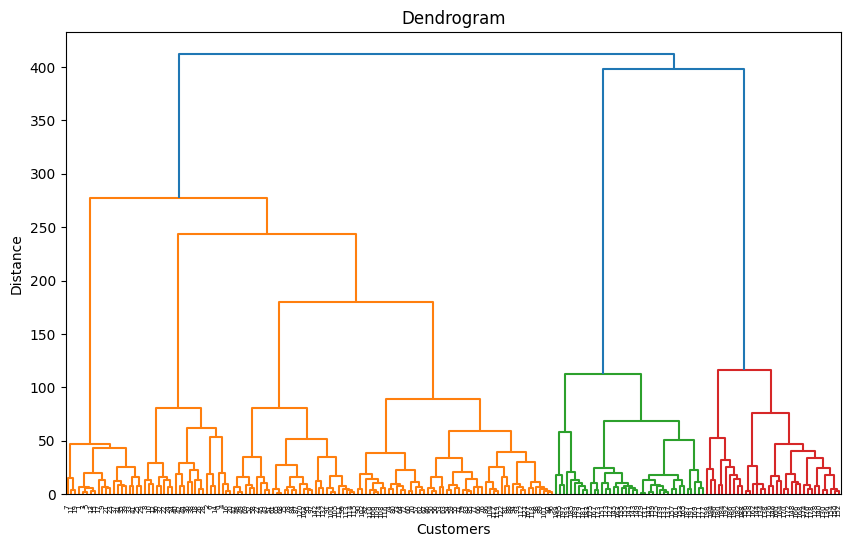

Silhouette Score: 0.4401889024290193
                        CustomerID    Gender        Age  Annual Income (k$)
Spending Score (1-100)                                                     
0                        85.108434  0.397590  42.156627           54.759036
1                       164.428571  0.571429  41.685714           88.228571
2                       162.000000  0.461538  32.692308           86.538462
3                        21.700000  0.400000  24.850000           24.950000
4                        23.000000  0.391304  45.217391           26.304348


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Perform Agglomerative Clustering
# Using Ward linkage and Euclidean distance
X = df_customers.drop(columns=['CustomerID', 'Gender'])
ward_linkage = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(ward_linkage, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, choose the optimal number of clusters

# Fit Agglomerative Clustering
n_clusters = 5  # Example: choosing 5 clusters
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_customers['Spending Score (1-100)'] = agg_cluster.fit_predict(X)

# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(X, df_customers['Spending Score (1-100)'])
print(f'Silhouette Score: {silhouette_avg}')

# Discuss insights from clusters
cluster_insights = df_customers.groupby('Spending Score (1-100)').mean()
print(cluster_insights)


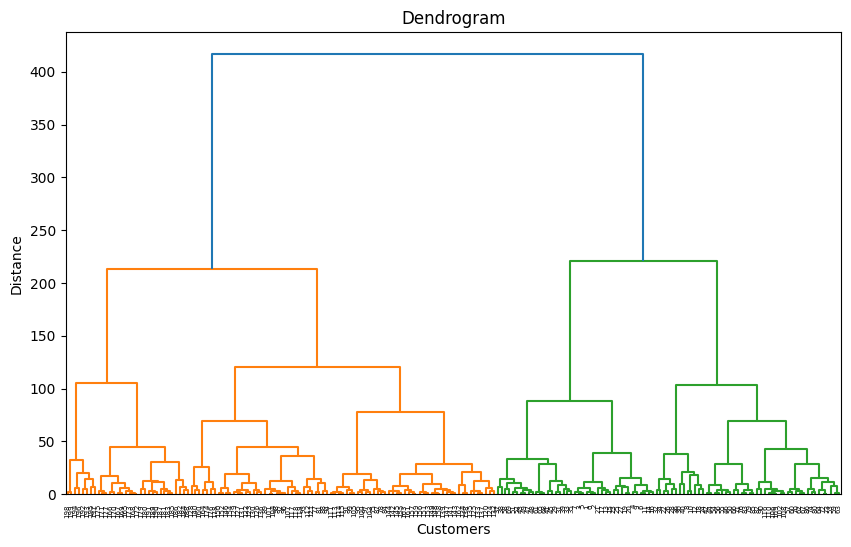

Silhouette Score: 0.36091081867088015
                        CustomerID    Gender        Age  Annual Income (k$)  \
Spending Score (1-100)                                                        
0                       183.562500  0.468750  35.718750          101.312500   
1                        61.208333  0.437500  56.479167           44.520833   
2                        30.195122  0.390244  26.853659           29.609756   
3                       129.325581  0.418605  26.906977           70.255814   
4                       124.694444  0.500000  46.055556           69.388889   

                        Cluster  
Spending Score (1-100)           
0                           0.0  
1                           1.0  
2                           2.0  
3                           3.0  
4                           4.0  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Perform Agglomerative Clustering
# Using Ward linkage and Euclidean distance
X = df_customers.drop(columns=['CustomerID', 'Gender'])
ward_linkage = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(ward_linkage, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, choose the optimal number of clusters

# Fit Agglomerative Clustering
n_clusters = 5  # Example: choosing 5 clusters
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_customers['Spending Score (1-100)'] = agg_cluster.fit_predict(X)

# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(X, df_customers['Spending Score (1-100)'])
print(f'Silhouette Score: {silhouette_avg}')

# Discuss insights from clusters
cluster_insights = df_customers.groupby('Spending Score (1-100)').mean()
print(cluster_insights)